In [1]:
import pandas as pd
housing=pd.read_excel("houses.xlsx")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [2]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


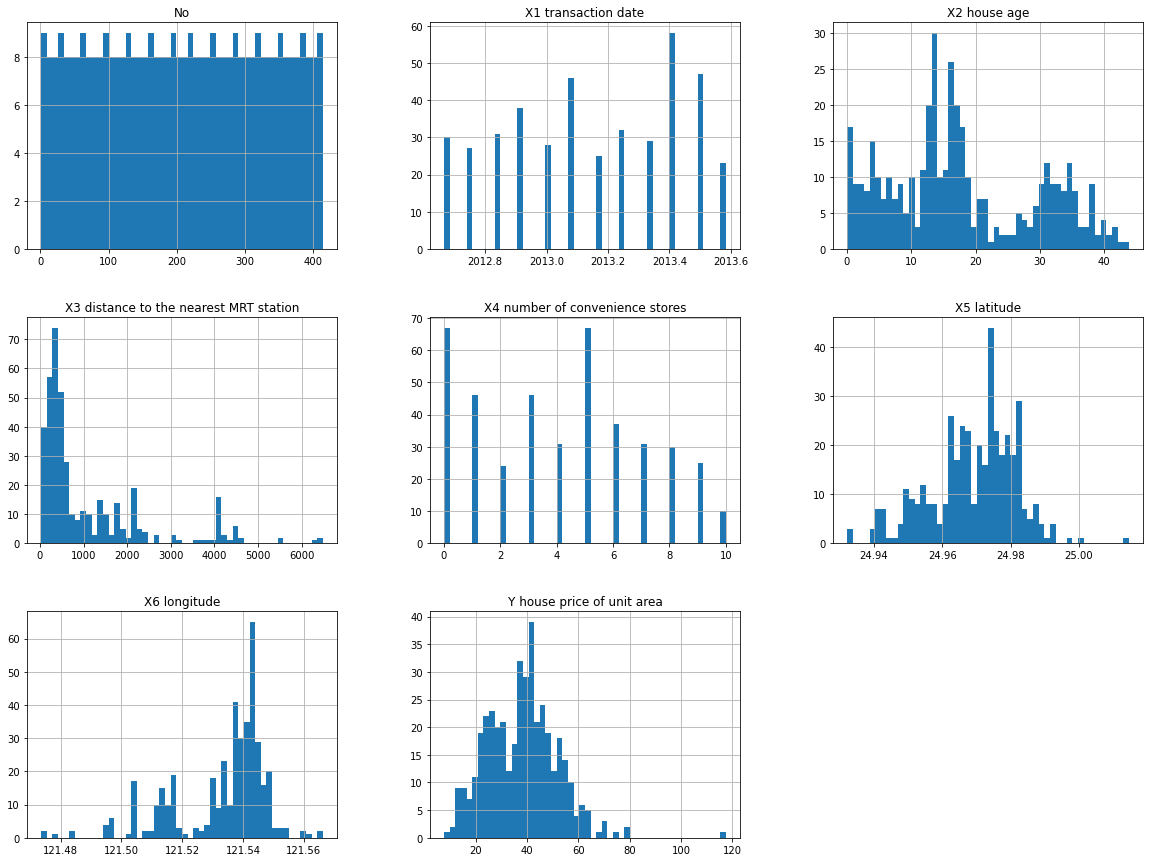

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot:>

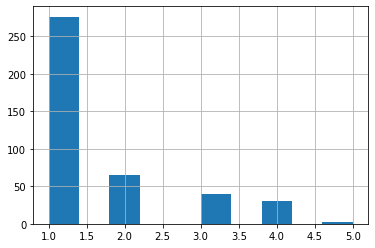

In [4]:
import numpy as np
housing["MRT distance"]=pd.cut(housing["X3 distance to the nearest MRT station"],bins=[0.,1000,2000,4000,6000,np.inf],labels=[1,2,3,4,5])
housing["MRT distance"].hist()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.15,random_state=42)
for train_index,test_index in split.split(housing,housing["MRT distance"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
# To keep an appropriate ratio of income in the training and testing set we take elements from each layer of income
# accordingly to the original value. That way the test set won't be inconsistent with training one
strat_test_set["MRT distance"].value_counts()/len(strat_test_set)

1    0.666667
2    0.158730
3    0.095238
4    0.079365
5    0.000000
Name: MRT distance, dtype: float64

In [6]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("MRT distance",axis=1,inplace=True)

In [7]:
correlation_matrix=housing.corr()
correlation_matrix["Y house price of unit area"].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087529
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

array([[<AxesSubplot:xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>,
        <AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>,
        <AxesSubplot:xlabel='X5 latitude', ylabel='Y house price of unit area'>,
        <AxesSubplot:xlabel='X6 longitude', ylabel='Y house price of unit area'>],
       [<AxesSubplot:xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>,
        <AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='X3 distance to the nearest MRT station'>,
        <AxesSubplot:xlabel='X4 number of convenience stores', ylabel='X3 distance to the nearest MRT station'>,
        <AxesSubplot:xlabel='X5 latitude', ylabel='X3 distance to the nearest MRT station'>,
        <AxesSubplot:xlabel='X6 longitude', ylabel='X3 distance to the nearest MRT station'>],
  

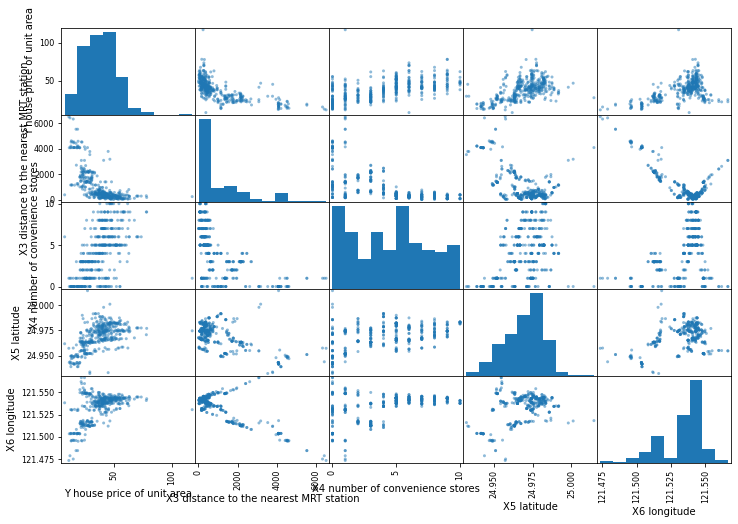

In [8]:
# high correlation between MRT distance, and convienience stores
from pandas.plotting import scatter_matrix
atributes=["Y house price of unit area","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]
scatter_matrix(housing[atributes],figsize=(12,8))

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

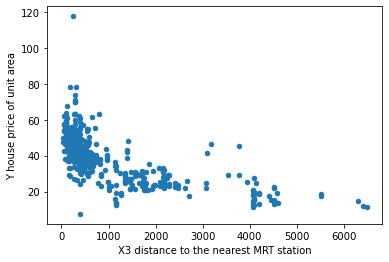

In [9]:

housing.plot(kind="scatter",y="Y house price of unit area",x="X3 distance to the nearest MRT station")

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

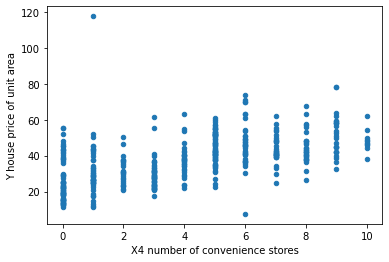

In [10]:

housing.plot(kind="scatter",y="Y house price of unit area",x="X4 number of convenience stores")

In [48]:
housing=strat_train_set.drop("Y house price of unit area",axis=1)
housing=strat_train_set.drop("X1 transaction date",axis=1)
housing=strat_train_set.drop("No",axis=1)
housing_labels=strat_train_set["Y house price of unit area"].copy()

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
num_pipeline=Pipeline([('std_scaler',StandardScaler()),
])

num_attribs=list(housing)
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
])
housing_prepared=full_pipeline.fit_transform(housing)


In [50]:
# checking out linear regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)
# preapring some test values same way as we prepared training set
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

print("EXPECTED VALUES", lin_reg.predict(some_data_prepared))

EXPECTED VALUES [42.  23.7 48.1 39.5 31.3]


In [51]:
print("Labels:",list(some_labels))

Labels: [42.0, 23.7, 48.1, 39.5, 31.3]


In [52]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

2.1826178961852975e-14

In [53]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
final_scores=np.sqrt(-scores)
print(final_scores)
print(final_scores.mean())
print(final_scores.std())

[1.70793218e-14 7.04170026e-15 9.18616231e-15 1.11944714e-14
 8.51381511e-15 1.37857848e-14 1.40353068e-14 7.53046012e-15
 1.54975591e-14 1.26430122e-14]
1.1650759385722935e-14
3.3142008379943885e-15


In [54]:
x_test=strat_test_set.drop("Y house price of unit area",axis=1)
x_test=strat_test_set.drop("X1 transaction date",axis=1)
x_test=strat_test_set.drop("No",axis=1)
y_test=strat_test_set["Y house price of unit area"].copy()
x_test_prepared=full_pipeline.transform(x_test)
final_prediction=lin_reg.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
final_rmse

2.210753618995709e-14

In [55]:
from scipy import stats
confidence=0.95
squared_errors=(final_prediction-y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)
                        ))

array([1.65884503e-14, 2.65011250e-14])